In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [2]:
# Merge datasets and aggregate transaction data
data = pd.merge(customers,
                transactions.groupby('CustomerID').agg(
                    total_spent=('TotalValue', 'sum'),
                    total_transactions=('TransactionID', 'count')
                ).reset_index(),
                on='CustomerID', how='left').fillna(0)

In [3]:
# Encode and normalize features
data['Region'] = LabelEncoder().fit_transform(data['Region'])
features = StandardScaler().fit_transform(data[['Region', 'total_spent', 'total_transactions']])

In [4]:
# Determine optimal number of clusters using DB Index
optimal_k, db_indexes = 2, []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    db_indexes.append(davies_bouldin_score(features, kmeans.labels_))
    if db_indexes[-1] == min(db_indexes):
        optimal_k = k

In [5]:
# Apply KMeans with the optimal number of clusters
data['Cluster'] = KMeans(n_clusters=optimal_k, random_state=42).fit_predict(features)

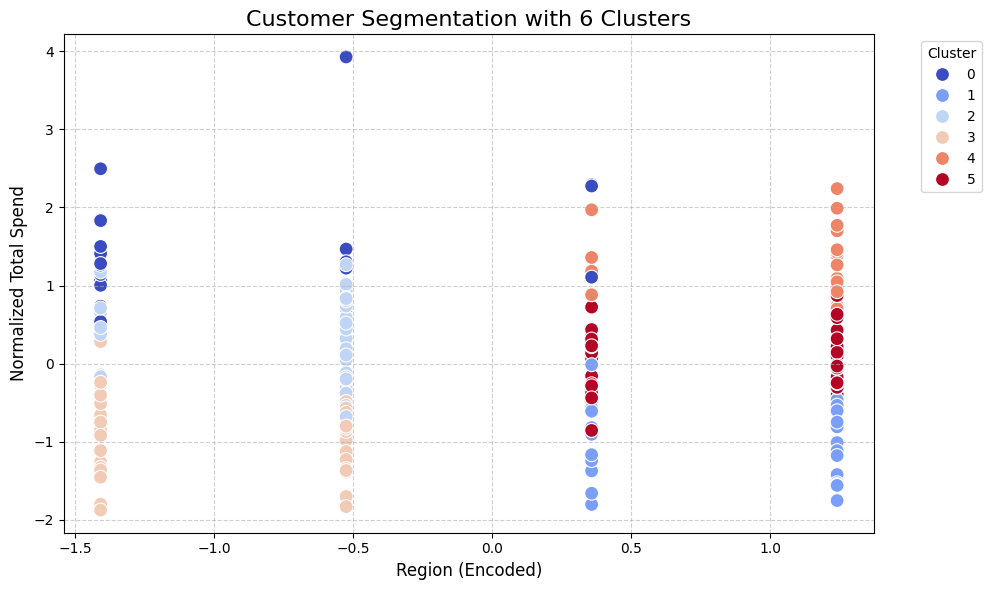

In [6]:
# Enhanced visualization for customer segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features[:, 0], y=features[:, 1], hue=data['Cluster'], palette="coolwarm", s=100, edgecolor="white"
)
plt.title(f"Customer Segmentation with {optimal_k} Clusters", fontsize=16)
plt.xlabel("Region (Encoded)", fontsize=12)
plt.ylabel("Normalized Total Spend", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

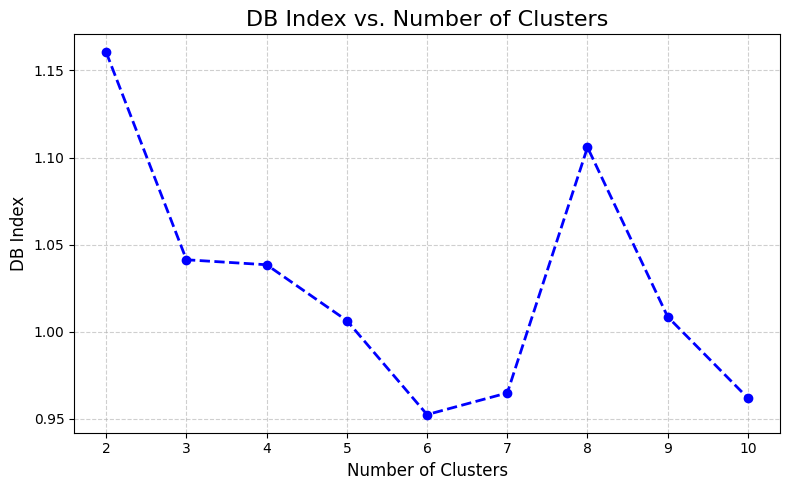

In [7]:
# Visualize DB Index across different cluster counts
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_indexes, marker='o', color='blue', linestyle='--', linewidth=2)
plt.title("DB Index vs. Number of Clusters", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("DB Index", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
# Output results
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index for Optimal Clusters: {min(db_indexes):.2f}")

Optimal Number of Clusters: 6
Davies-Bouldin Index for Optimal Clusters: 0.95
